<a href="https://colab.research.google.com/github/shubham62025865/shubham1/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## About dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

link - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df["Outcome"].value_counts() * 100 / len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]

In [ ]:
print(X.shape)
y.shape

(768, 8)


(768,)

In [ ]:
## train test split stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 24)

print(f"shape of X_train :{X_train.shape}")
print(f"shape of X_test :{X_test.shape}")
print(f"shape of y_train :{y_train.shape}")
print(f"shape of y_test :{y_test.shape}")

shape of X_train :(614, 8)
shape of X_test :(154, 8)
shape of y_train :(614,)
shape of y_test :(154,)


In [ ]:
y_train.value_counts() * 100 / len(y_train)

0    65.14658
1    34.85342
Name: Outcome, dtype: float64

In [ ]:
y_test.value_counts() * 100 / len(y_test)

0    64.935065
1    35.064935
Name: Outcome, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.min(),X_train_scaled.max()

(-4.111818224228965, 6.411300880041298)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(penalty = "l1", C = 0.07, solver = "liblinear")

log_reg.fit(X_train_scaled, y_train)
log_reg.coef_

array([[ 0.31678736,  0.84639163, -0.01242381,  0.        ,  0.        ,
         0.45099412,  0.14053922,  0.08172516]])

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
selected_col = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X_train_new = X_train[selected_col]
X_test_new = X_test[selected_col]

X_train_new_scaled = scaler.fit_transform(X_train_new)
X_test_new_scaled = scaler.transform(X_test_new)

In [ ]:
a = pd.Series([1,2,3,4])
a

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
a.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
type(a.values)

numpy.ndarray

In [ ]:
X_train.values.min()

0.0

In [ ]:
X_train.values.min(), X_train.values.max()

(0.0, 846.0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       100
           1       0.66      0.35      0.46        54

    accuracy                           0.71       154
   macro avg       0.69      0.63      0.63       154
weighted avg       0.70      0.71      0.68       154



In [ ]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80       100
           1       0.66      0.35      0.46        54

    accuracy                           0.71       154
   macro avg       0.69      0.63      0.63       154
weighted avg       0.70      0.71      0.68       154



In [ ]:
knn.score(X_test_scaled, y_test)

0.7077922077922078

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.4578313253012048

In [ ]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# inpurt different k values, 
# f1_score for each k value
# plot


def elbow_data(n = 20, X_train = X_train_scaled, X_test = X_test_scaled, y_train = y_train, y_test  = y_test):
  f1 = []
  k_value = []
  # k = np.arange(1,20)
  for k in range(1, n):
    k_value.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1.append(f1_score(y_test, y_pred))

  plt.plot(k_value,f1)
  plt.xlabel("K Values")
  plt.ylabel("F1 score")
  plt.title("F1 score vs k values")
  plt.show()
  return f1

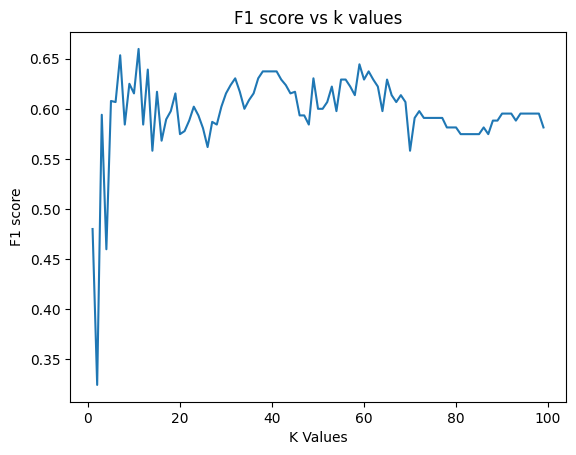

In [ ]:
f1 = elbow_data(n = 100, X_train = X_train_new_scaled, X_test = X_test_new_scaled)

In [ ]:
max(f1)

0.6597938144329897

In [ ]:
f1.index(max(f1))

10

In [ ]:
# best value of k is 11

knn = KNeighborsClassifier(n_neighbors = 11)

knn.fit(X_train_new_scaled, y_train)
y_pred = knn.predict(X_test_new_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       100
           1       0.74      0.59      0.66        54

    accuracy                           0.79       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [ ]:
a = [1,2,3,4,8]
# 4 index
a.index(4)

3

In [ ]:
|

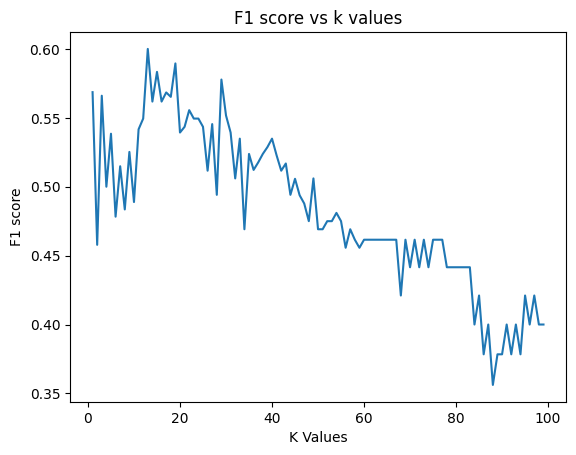

In [ ]:
elbow_data(n = 100)

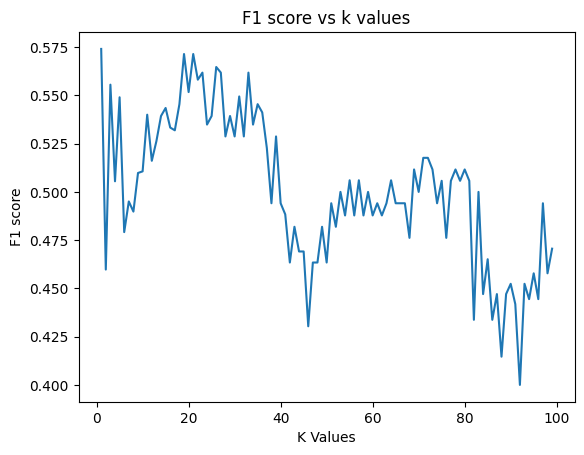

In [ ]:
elbow_data(n = 100, X_train = X_train, X_test = X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_r = LogisticRegression(penalty = "l1",C = 0.11, solver = 'liblinear')
log_r.fit(X_train_scaled, y_train)
log_r.coef_

array([[ 0.36346341,  0.90495897, -0.09108246,  0.        ,  0.        ,
         0.53255418,  0.18637482,  0.12033656]])

In [ ]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
selected_col = ['Pregnancies', 'Glucose',
       'BMI', 'DiabetesPedigreeFunction']

In [ ]:
X_train_new = X_train[selected_col]
X_test_new = X_test[selected_col]

In [ ]:
X_train_scaled_new = scaler.fit_transform(X_train_new)
X_test_scaled_new = scaler.transform(X_test_new)

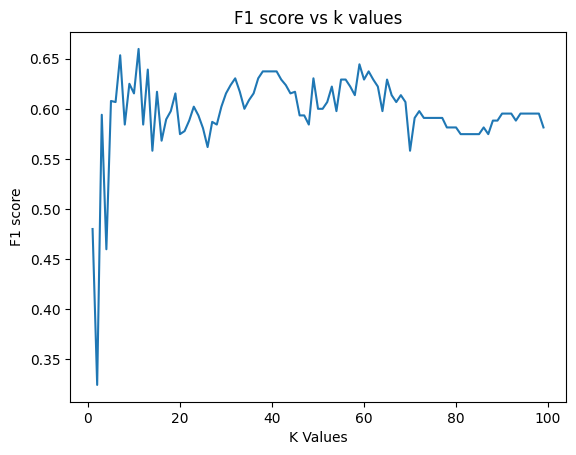

In [ ]:
elbow_data(n = 100, X_train = X_train_scaled_new, X_test = X_test_scaled_new)

In [ ]:
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]

In [ ]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
print(f'ratio of 0 class {round(len(y[y.values==0]) / len(y),2)}')
print(f'ratio of 1 class {round(len(y[y.values==1]) / len(y),2)}')

ratio of 0 class 0.65
ratio of 1 class 0.35


In [ ]:
from sklearn.model_selection import train_test_split
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24, stratify=y)

print(f'Shape of X_train -: {X_train.shape}')
print(f'Shape of X_test -: {X_test.shape}')
print(f'Shape of y_train -: {y_train.shape}')
print(f'Shape of y_test -: {y_test.shape}')

Shape of X_train -: (614, 8)
Shape of X_test -: (154, 8)
Shape of y_train -: (614,)
Shape of y_test -: (154,)


In [ ]:
print(f'ratio of 0 class {round(len(y_train[y_train.values==0]) / len(y_train),2)}')
print(f'ratio of 1 class {round(len(y_train[y_train.values==1]) / len(y_train),2)}')

ratio of 0 class 0.65
ratio of 1 class 0.35


In [ ]:
print(f'ratio of 0 class {round(len(y_test[y_test.values==0]) / len(y_test),2)}')
print(f'ratio of 1 class {round(len(y_test[y_test.values==1]) / len(y_test),2)}')

ratio of 0 class 0.65
ratio of 1 class 0.35


In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy = []
test_accuracy = []

for k in neighbors:
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy.append(knn.score(X_train, y_train))
    
    #Compute accuracy on the test set
    test_accuracy.append(knn.score(X_test, y_test))

In [ ]:
maxpos = test_accuracy.index(max(test_accuracy))
maxpos

25

In [ ]:
neighbors[25]

26

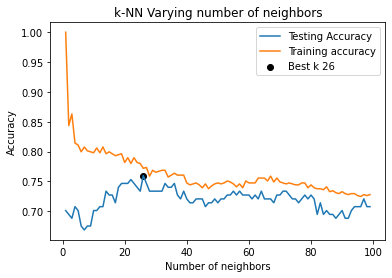

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.scatter(neighbors[maxpos], test_accuracy[maxpos], marker='o', color='black', label=f'Best k {neighbors[maxpos]}')
plt.plot()
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=26)

In [ ]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=26)

In [ ]:
knn.score(X_test,y_test)

0.7597402597402597

In [ ]:
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.83       100
           1       0.77      0.44      0.56        54

    accuracy                           0.76       154
   macro avg       0.77      0.69      0.70       154
weighted avg       0.76      0.76      0.74       154



In [ ]:
def confusion(y_test, y_pred):

    sns.set_theme(style="whitegrid")
    plt.rcParams["figure.figsize"] = [7, 4]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    cm = sns.heatmap(df_cm,annot=True)
    cm.plot()

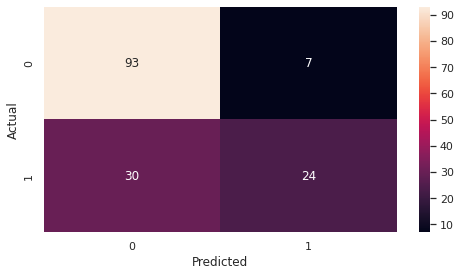

In [ ]:
confusion(y_test, y_pred)

In [ ]:
pred_prob = knn.predict_proba(X_test)

In [ ]:
pred_prob

In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
gmeans1 = np.sqrt(tpr1 * (1-fpr1))

In [ ]:
ix1 = np.argmax(gmeans1)

In [ ]:
print('For model1 Best Threshold=%f, G-Mean=%.3f' % (thresh1[ix1], gmeans1[ix1]))

For model1 Best Threshold=0.384615, G-Mean=0.733


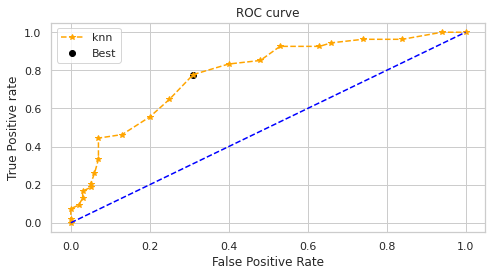

In [ ]:
# plot roc curves
plt.plot(fpr1, tpr1,marker = '*', linestyle='--',color='orange', label='knn')
# plt.plot(fpr2, tpr2,marker = '*', linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.scatter(fpr1[ix1], tpr1[ix1], marker='o', color='black', label='Best')
# plt.scatter(fpr2[ix2], tpr2[ix2], marker='o', color='black', label='Best')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.show()

In [ ]:
def custom_predict(model,X_test, threshold):
    probs = model.predict_proba(X_test)
    return (probs[:, 1] > threshold).astype(int)

In [ ]:
y_pred_1 = custom_predict(knn, X_test, thresh1[ix1])

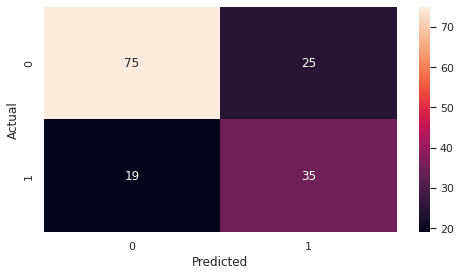

In [ ]:
confusion(y_test, y_pred_1)

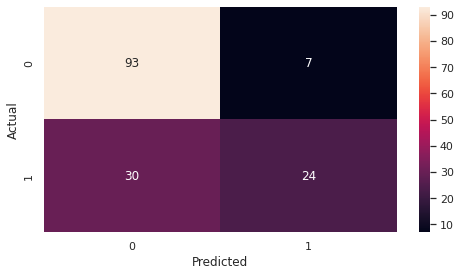

In [ ]:
confusion(y_test, y_pred)